## Linear Regression
- Mathematical model:
$$ \hat{y} = X \cdot \theta $$
- Optimization $\theta$ involves the minimizing the loss function
$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}_{i}-y_{i}){^2} $$
- Evaluation model with average squared error
$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}_{i}-y_{i}){^2} $$

In [23]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def predict(X, theta):
  return np.dot(X, theta).reshape(-1)

In [25]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000, track_cost=False):
    m = len(y)
    y = y.values.reshape(-1, 1) if hasattr(y, 'values') else y.reshape(-1, 1)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients

        if track_cost:
            cost = np.mean(errors ** 2)
            cost_history.append(cost)

    return (theta, cost_history) if track_cost else theta


In [26]:
def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot if ss_tot != 0 else 0

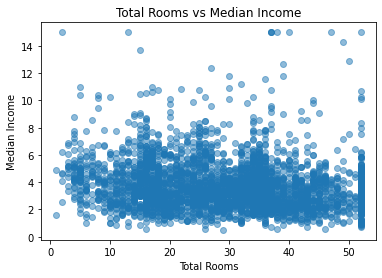

In [27]:
raw_data = pd.read_csv("../../sample-data/california_housing_test.csv")
data = raw_data[["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]]
x_col = "housing_median_age"
y_col = "median_income"

X = data.drop(columns=y_col).values
y = data[y_col].values.reshape(-1, 1)

plt.scatter(data[x_col], data[y_col], alpha=0.5)
plt.xlabel("Total Rooms")
plt.ylabel("Median Income")
plt.title("Total Rooms vs Median Income")
plt.show()

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agregar bias
X_bias = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

theta = np.random.randn(X_bias.shape[1], 1)
learning_rate = 0.01
iterations = 2000

In [29]:
theta_optimized = gradient_descent(X_bias, y, theta, learning_rate=0.0000001, iterations=1000)

y_pred = predict(X_bias, theta_optimized)
mse = mean_squared_error(y, y_pred.flatten())
r2 = r_squared(y, y_pred.flatten())

print("MSE: ", mse)
print("R2: ", r2)
print("Y pred", y_pred)
print("Theta optimized", theta_optimized)

MSE:  24.586346670509386
R2:  -6.151211468709253
Y pred [-0.60272293 -1.53869864 -0.61477068 ...  0.9268378  -0.9936724
 -1.45421262]
Theta optimized [[-0.74385716]
 [-0.95092432]
 [ 0.14959729]
 [ 0.58142756]
 [-0.48399307]
 [-0.6552067 ]]


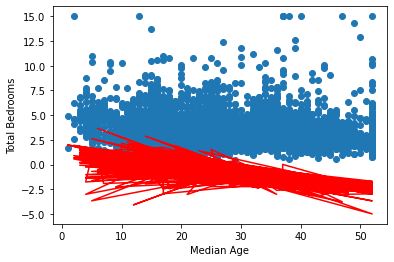

In [30]:
plt.scatter(data[x_col], data[y_col])
plt.plot(data[x_col], y_pred, color="red")
plt.xlabel("Median Age")
plt.ylabel("Total Bedrooms")
plt.show()

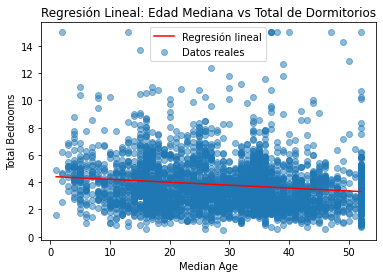

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar los datos
data = raw_data[[x_col, y_col]]

# Extraer X y y
X = data[x_col].values.reshape(-1, 1)  # Necesita ser 2D
y = data[y_col].values

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# Hacer predicciones para la línea
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Gráfico
plt.scatter(X, y, alpha=0.5, label="Datos reales")
plt.plot(x_range, y_pred, color='red', label="Regresión lineal")
plt.xlabel("Median Age")
plt.ylabel("Total Bedrooms")
plt.title("Regresión Lineal: Edad Mediana vs Total de Dormitorios")
plt.legend()
plt.show()

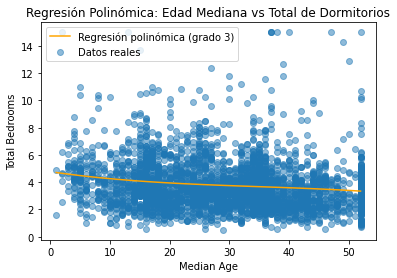

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Crear el modelo polinómico de grado 3
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Ajustar el modelo
poly_model.fit(X, y)

# Predicciones
y_poly_pred = poly_model.predict(x_range)

# Gráfico
plt.scatter(X, y, alpha=0.5, label="Datos reales")
plt.plot(x_range, y_poly_pred, color='orange', label=f"Regresión polinómica (grado {degree})")
plt.xlabel("Median Age")
plt.ylabel("Total Bedrooms")
plt.title("Regresión Polinómica: Edad Mediana vs Total de Dormitorios")
plt.legend()
plt.show()